In [1]:
import networkx as nx
import pandas as pd

In [154]:
g = nx.Graph()
data = pd.read_csv('dataset.csv')
display(data.head())
    

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [148]:
display(data.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [155]:
j=0
for artists in data['artists'].dropna(): 
    artist_list = [artists.strip() for artists in artists.split(';')] 
    

    for artist in artist_list:
        g.add_node(artist)
    
    i=0

    for left_artist in artist_list:
        for right_artist in artist_list[i+1:]:
            if left_artist != right_artist:  # Ensure no self-loops
                g.add_edge(left_artist, right_artist)
                if(j<5):
                    print(left_artist,right_artist)
                    j+=1

edges = list(g.edges())[:5]

print(edges)



    # j+=1
    # if(j==10):
    #     break

        

Ingrid Michaelson ZAYN
A Great Big World Christina Aguilera
Jason Mraz Colbie Caillat
Chord Overstreet Deepend
Andrew Foy Renee Foy
[('Ingrid Michaelson', 'ZAYN'), ('Ingrid Michaelson', 'AJR'), ('Ingrid Michaelson', 'A Great Big World'), ('Ingrid Michaelson', 'Cody'), ('Ingrid Michaelson', 'Heart')]


In [ ]:
# for u in sorted(degree_centrality, key = degree_centrality.get, reverse=True)[:top_k]:
#     print(u, '--', degree_centrality[u])

Pritam -- 0.005928258029942727
Wolfgang Amadeus Mozart -- 0.005526342231302541
Giuseppe Verdi -- 0.004889975550122249
Arijit Singh -- 0.0043540878186020026
Yuvan Shankar Raja -- 0.0038516930703017716
Shreya Ghoshal -- 0.003583749204541648
ILLENIUM -- 0.003215326389121479
Neha Kakkar -- 0.0031818334059014633
Giacomo Puccini -- 0.002980875506581371
Traditional -- 0.002813410590481294
Luciano Pavarotti -- 0.0027799176072612784
A.R. Rahman -- 0.0026794386576012323
Badshah -- 0.002645945674381217
Amit Trivedi -- 0.00247848075828114
Sebastian Yatra -- 0.0024449877750611247
Juanes -- 0.0024449877750611247
Sunidhi Chauhan -- 0.0024449877750611247
Yo Yo Honey Singh -- 0.0024449877750611247
Sonu Nigam -- 0.0024114947918411093
J Balvin -- 0.002344508825401078


In [ ]:
degree_centrality = nx.degree_centrality(g)
# top_k = 20
N = len(g.nodes())
degree_df = pd.DataFrame({
    "Artist": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Total Edges": [int(dc * (N - 1)) for dc in degree_centrality.values()]
})

degree_df = degree_df.sort_values(by="Degree Centrality", ascending=False,)
display(degree_df[:10])

,Artist,Degree Centrality,Total Edges
6900,Pritam,0.005928,177
5238,Wolfgang Amadeus Mozart,0.005526,164
5493,Giuseppe Verdi,0.004890,146
11081,Arijit Singh,0.004354,130
16961,Yuvan Shankar Raja,0.003852,115
5333,Shreya Ghoshal,0.003584,106
6733,ILLENIUM,0.003215,96
11085,Neha Kakkar,0.003182,94
5492,Giacomo Puccini,0.002981,89
24695,Traditional,0.002813,84


In [191]:
eigenvector = nx.eigenvector_centrality(g)
eigenvector_df = pd.DataFrame({
    "Artist": list(eigenvector.keys()),  # Ensures each row has a single artist
    "Eigenvector Centrality": list(eigenvector.values())
})
eigenvector_df = eigenvector_df.sort_values(by="Eigenvector Centrality", ascending=False)
display(eigenvector_df[:10])

,Artist,Eigenvector Centrality
788,Juanes,0.180000
777,Alejandro Sanz,0.172239
27247,Macaco,0.170800
19634,David Bisbal,0.164066
19642,Rozalén,0.163480
19633,Pablo Alborán,0.163044
19638,India Martinez,0.162935
19639,Antonio Orozco,0.162729
19641,Laura Pausini,0.162692
19644,Manuel Carrasco,0.162472


In [192]:
closeness_centralilty = nx.closeness_centrality(g)
closeness_df = pd.DataFrame({
    "Artist": list(closeness_centralilty.keys()),  # Ensures each row has a single artist
    "Closeness Centrality": list(closeness_centralilty.values())
})
closeness_df = closeness_df.sort_values(by="Closeness Centrality", ascending=False)
display(closeness_df[:10])

,Artist,Closeness Centrality
6724,J Balvin,0.083516
6682,Sean Paul,0.083059
6685,DJ Snake,0.083047
6919,R3HAB,0.082649
6687,David Guetta,0.082085
6459,Justin Bieber,0.081427
4816,Tiësto,0.081252
1132,Marshmello,0.080750
6683,Dua Lipa,0.079869
6794,Diplo,0.079092


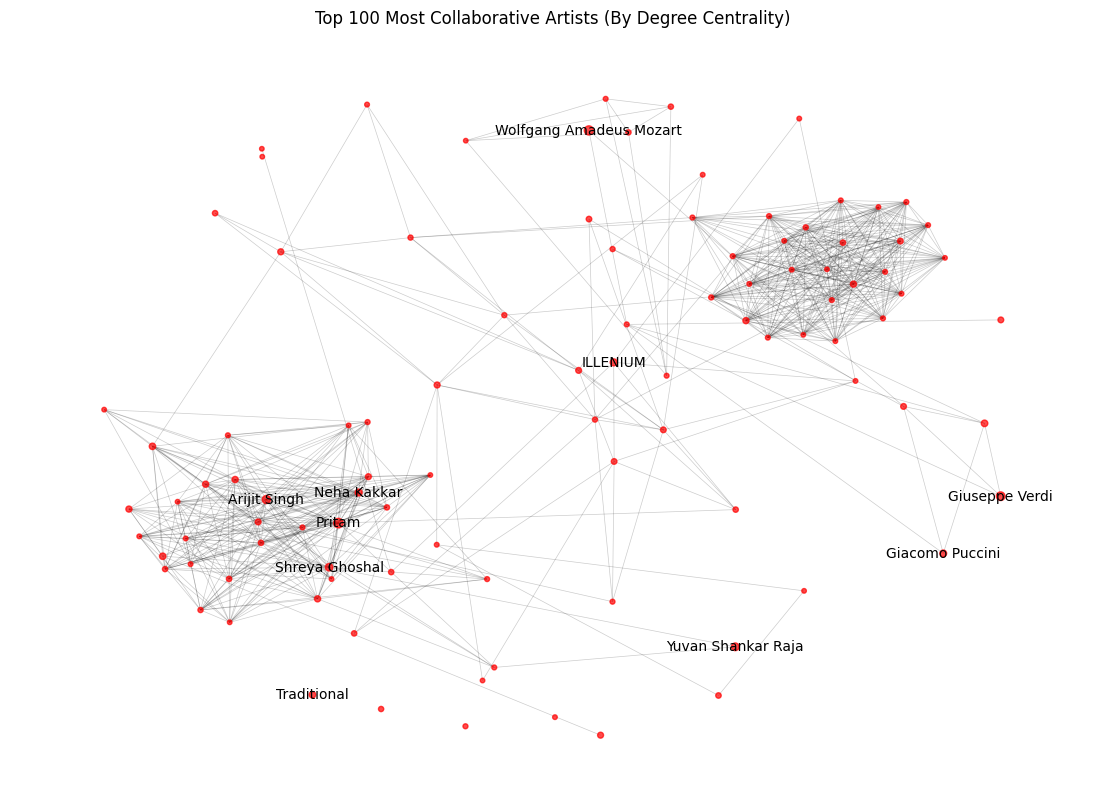

In [ ]:
import matplotlib.pyplot as plt 

top_artists = degree_df.nlargest(100, 'Degree Centrality')

g_sub = g.subgraph(top_artists["Artist"].tolist())

pos = nx.spring_layout(g_sub, k=.8, seed=42)  

node_size = [degree_centrality[artist] * 8000 for artist in g_sub.nodes()]

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(g_sub, pos, node_size=node_size, node_color='red', alpha=0.7)
nx.draw_networkx_edges(g_sub, pos, alpha=0.2, width=0.5)

top_labels = top_artists.nlargest(10, 'Degree Centrality')['Artist']
labels = {artist: artist for artist in g_sub.nodes() if artist in top_labels.values.tolist()}
nx.draw_networkx_labels(g_sub, pos, labels, font_size=10, font_color='black')

plt.title("Top 100 Most Collaborative Artists (By Degree Centrality)")
plt.axis('off')
plt.show()


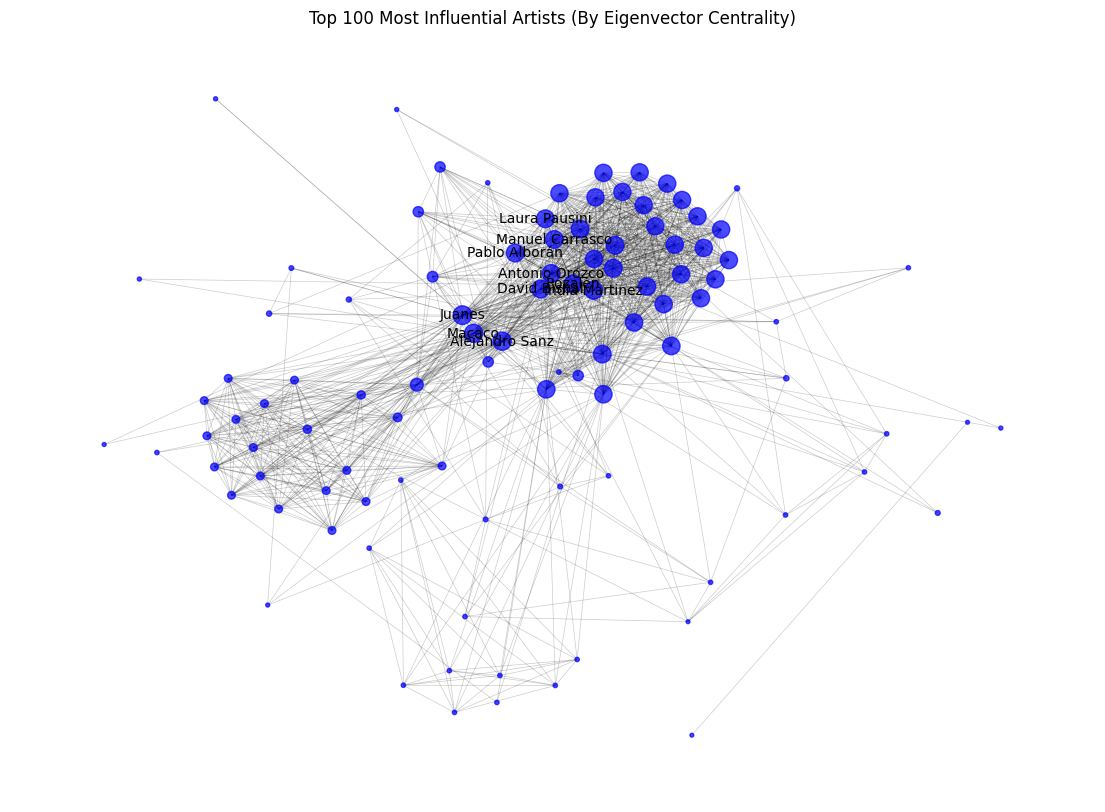

In [ ]:

top_eigen_artists = eigenvector_df.nlargest(100, 'Eigenvector Centrality')

g_eigen_sub = g.subgraph(top_eigen_artists["Artist"].tolist())

pos = nx.spring_layout(g_eigen_sub, k=.8, seed=42)  

node_size = [eigenvector[artist] * 1000 for artist in g_eigen_sub.nodes()]

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(g_eigen_sub, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(g_eigen_sub, pos, alpha=0.2, width=0.5)

top_eigen_labels = top_eigen_artists.nlargest(10, 'Eigenvector Centrality')['Artist']
labels = {artist: artist for artist in g_eigen_sub.nodes() if artist in top_eigen_labels.values.tolist()}
nx.draw_networkx_labels(g_eigen_sub, pos, labels, font_size=10, font_color='black')

plt.title("Top 100 Most Influential Artists (By Eigenvector Centrality)")
plt.axis('off')
plt.show()

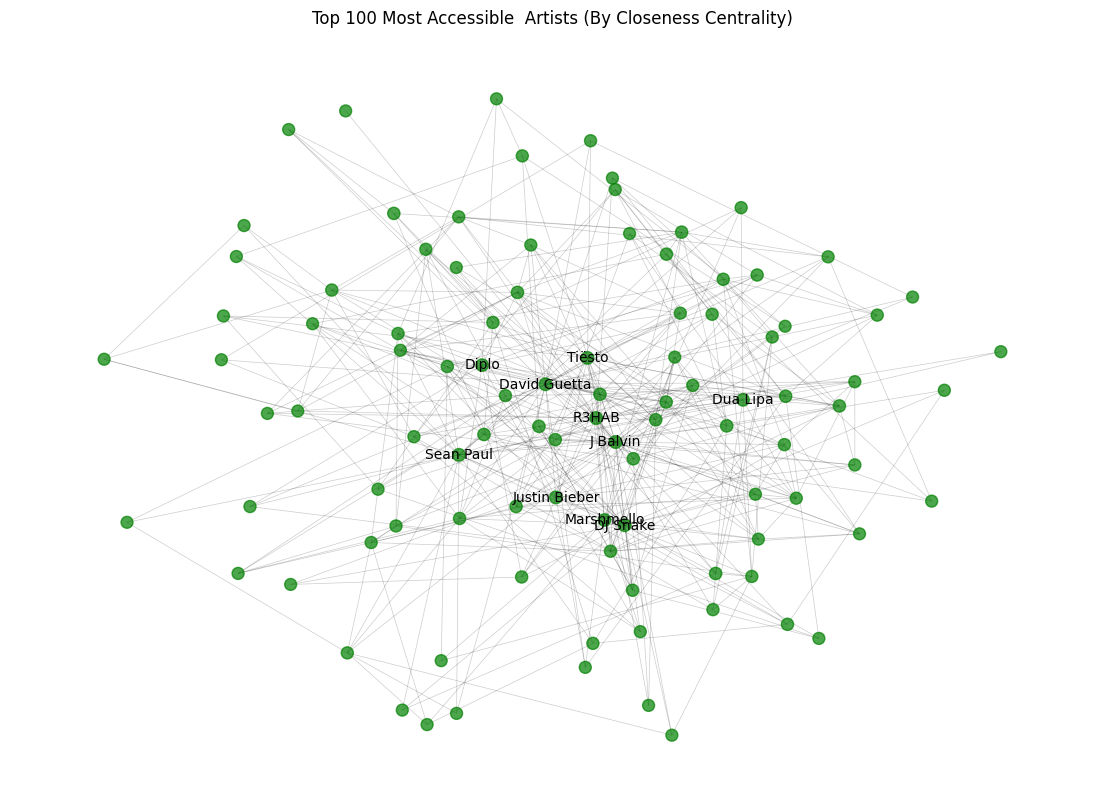

In [214]:


top_closeness_artists = closeness_df.nlargest(100, 'Closeness Centrality')

g_closeness_sub = g.subgraph(top_closeness_artists["Artist"].tolist())

pos = nx.spring_layout(g_closeness_sub, k=.8, seed=42)  

node_size = [closeness_centralilty[artist] * 1000 for artist in g_closeness_sub.nodes()]

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(g_closeness_sub, pos, node_size=node_size, node_color='green', alpha=0.7)
nx.draw_networkx_edges(g_closeness_sub, pos, alpha=0.2, width=0.5)

top_closeness_labels = top_closeness_artists.nlargest(10, 'Closeness Centrality')['Artist']
labels = {artist: artist for artist in g_closeness_sub.nodes() if artist in top_closeness_labels.values.tolist()}
nx.draw_networkx_labels(g_closeness_sub, pos, labels, font_size=10, font_color='black')

plt.title("Top 100 Most Accessible  Artists (By Closeness Centrality)")
plt.axis('off')
plt.show()